In [12]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from IPython.utils import io
from bt_grid_trading import * 
from grid_trading_loss import * 

[ 1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.  9900.
  9990. 10010. 10100. 11000. 12000. 13000. 14000. 15000. 16000. 17000.
 18000. 19000.]


0      0.0
1     -0.5
2      0.5
3      2.0
4     -1.0
5      4.0
6     -3.0
7      2.0
8      4.0
9     -7.0
10    14.0
dtype: float64

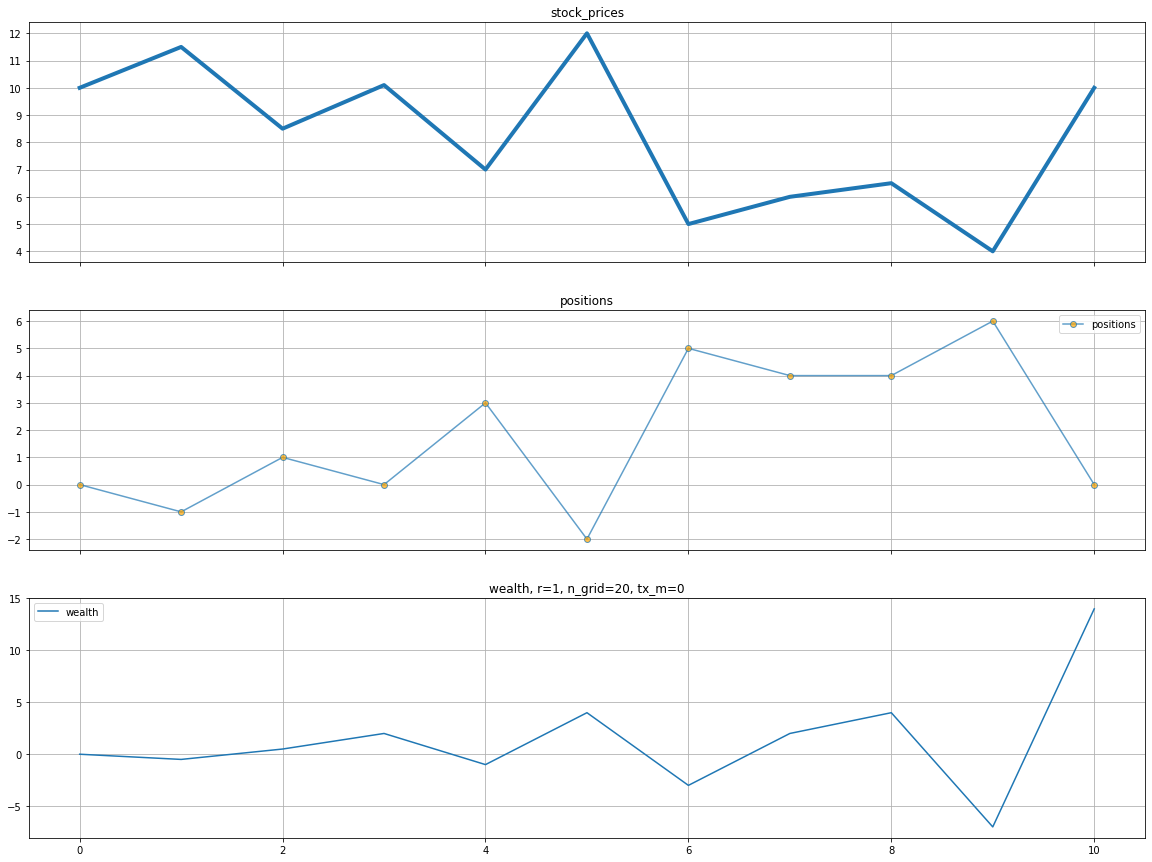

In [36]:
# 策略参数
w0 = 0
r = 1
n_grid = 20
tp = "arth"
# data = pd.Series(np.array([10, 11.5, 8.5, 10.1, 7, 12, 5, 6, 6.5, 4, 10]))
# data = pd.Series(np.array([10, 12, 14, 10.1, 7, 12, 5, 6, 6.5, 4, 10]))
# data = pd.Series(np.array([10, 14, 11, 15, 12]))
# data = pd.Series(np.array([10, 11.5, 8.5, 7, 12, 5, 6]))
# data = pd.Series(np.array([10, 9.5, 10.5, 10.5, 9.5]))

# test 
static_grid_bt = StaticGridBT(
    w0, r, n_grid, tp, data, is_trading_even=False, tx_m=0, tx_t=0, grid_quantity=1)
# static_grid_bt.run_on_bar()


with io.capture_output() as captured: # this will supress (e.g. capture) stdout and stderr
    static_grid_bt.run_on_bar()

static_grid_bt.plot_results()
static_grid_bt.wealth

In [32]:
# 理论算法
profit = (data.diff().abs().sum() - abs(data.iloc[-1] - data.iloc[0])) * 0.5

loss = get_grid_loss_v3(data.iloc[0], data.iloc[-1], r)
print(profit, loss, profit - loss)


1.0 -0.0 1.0
